Missing values in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Numeric Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Outliers in 'age': 169
     age
1     82
116   78
118   83
128   81
199   90

Outliers in 'fnlwgt': 903
     fnlwgt
8    422013
101  456062
129  427422
262  816750
305  454508

Outliers in 'education.num': 196
      education.num
26                2
219               2
1075              2
1106              1
1153              1

Outliers in 'capital.gain': 2390
      capital.gain
1678         41310
1679         41310
1681         34095
1682         34095
1683         34095

Outliers in 'capital.loss': 

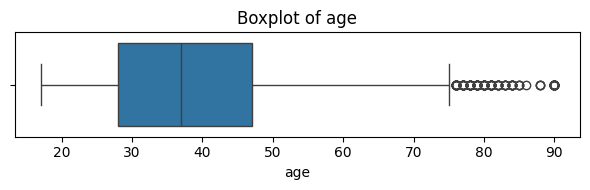

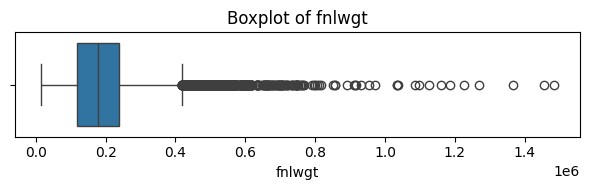

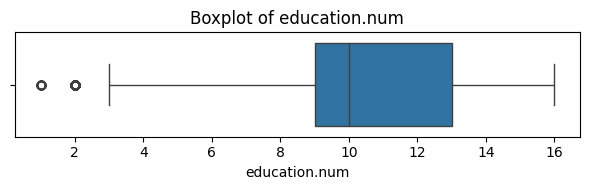

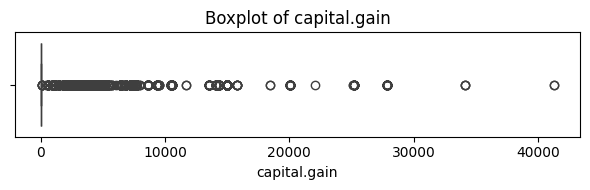

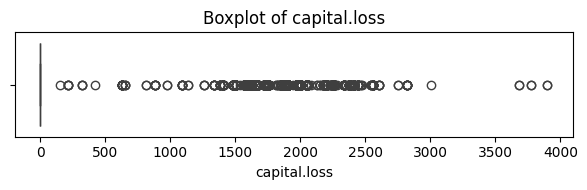

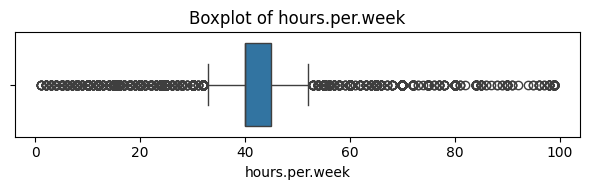

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
Shape before removing outliers: (30162, 15)
Shape after removing outliers : (18542, 15)

Outliers in 'age': 10
       age
5298    75
5951    75
6768    75
6793    75
10087   75

Outliers in 'fnlwgt': 176
      fnlwgt
1624  401118
1655  408537
4311  410867
4576  416103
4611  405855

Outliers in 'education.num': 528
      education.num
4243              4
4281              3
4302              4
4390              4
4402              3

Outliers in 'capital.gain': 0
Empty DataFrame
Columns: [capital.gain]
Index: []

Outliers in 'capital.loss': 0
Empty DataFrame
Columns: [capital.loss]
Index: []

Outliers in 'hours.per.week': 4013
      hours.per.week
1522              50
1526       

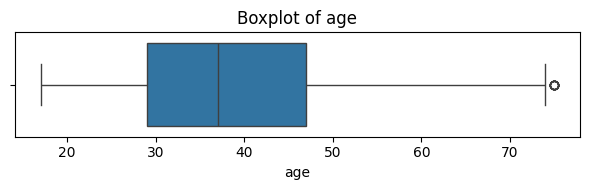

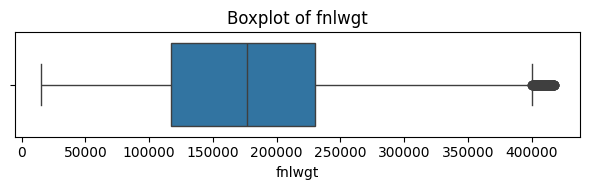

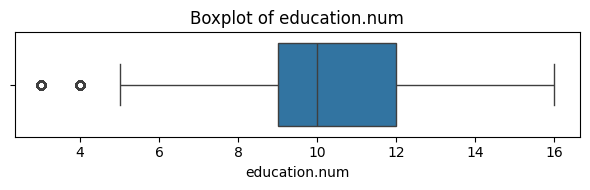

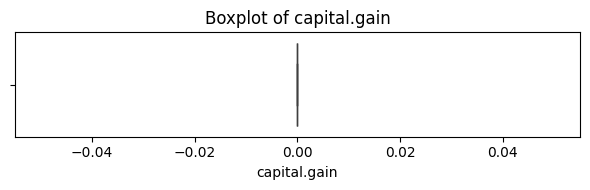

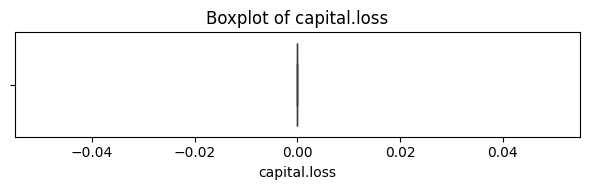

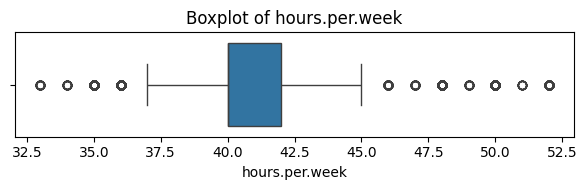

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with missing value handling
df = pd.read_csv("adult.csv", na_values='?')

# Check missing values

print("Missing values in each column:")
print(df.isnull().sum())
df=df.dropna()
# For categorical columns like 'workclass', fill with mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)
df['capital.gain'] = df['capital.gain'].replace(99999, 0)
df['capital.loss'] = df['capital.loss'].replace(4356, 0)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns:", list(numeric_cols))

# IQR outlier detection function
def find_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

# Detect and print outliers in each numeric column
for col in numeric_cols:
    outliers = find_outliers_iqr(df, col)
    print(f"\nOutliers in '{col}': {len(outliers)}")
    print(outliers[[col]].head())

# Visualize using boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()
print(df.isnull().sum())

def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply it on your current cleaned DataFrame
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers :", df_no_outliers.shape)
for col in numeric_cols:
    outliers = find_outliers_iqr(df_no_outliers, col)
    print(f"\nOutliers in '{col}': {len(outliers)}")
    print(outliers[[col]].head())
    
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df_no_outliers, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
#df = pd.read_csv("adult.csv")  # Ensure dataset is cleaned already
#print(df_no_outliers.head)
X = df_no_outliers.drop('income', axis=1)
y = LabelEncoder().fit_transform(df_no_outliers['income'])

# Split by type
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

X_cat = OneHotEncoder(sparse=False, handle_unknown='ignore').fit_transform(X[cat_cols])
print(X_cat)
X_num =StandardScaler().fit_transform(X[num_cols])

# Define weighted distance
alpha, beta = 0.4, 0.6
X_comb = np.hstack((alpha * X_num, beta * X_cat))

X_train, X_test, y_train, y_test = train_test_split(X_comb, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
print("Adult Income Accuracy:", accuracy_score(y_test, knn.predict(X_test)))
print("Classification Report:\n", classification_report(y_test,knn.predict(X_test) ))

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]]
Adult Income Accuracy: 0.829064437853869
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      2951
           1       0.58      0.58      0.58       758

    accuracy                           0.83      3709
   macro avg       0.74      0.74      0.74      3709
weighted avg       0.83      0.83      0.83      3709



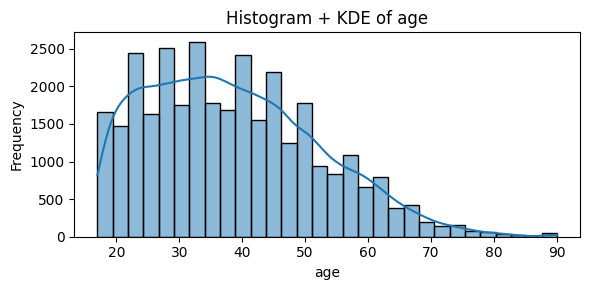

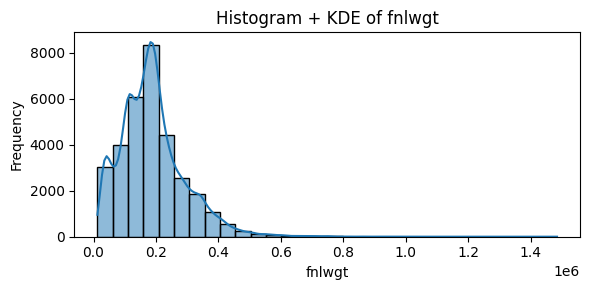

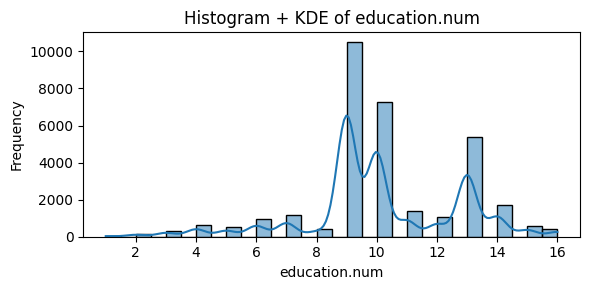

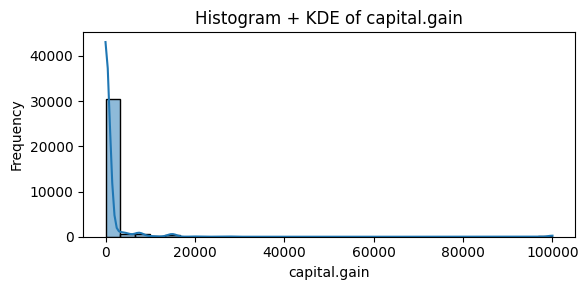

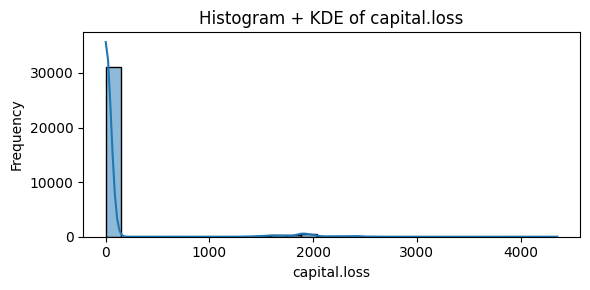

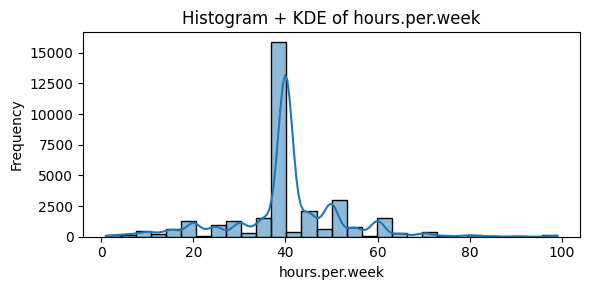

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("adult.csv")  # or use sklearn diabetes dataset

# Choose a column to check normality (e.g., 'glucose', 'bmi', etc.)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram + KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
